# Football Match Predictor using Scraped Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading Data

In [2]:
url = "matches_full.csv"
matches = pd.read_csv(url)

## Initial Data Exploration

In [3]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,opp formation
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,NaN
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,NaN
2,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,NaN
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,NaN
4,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,NaN


In [4]:
matches.columns


Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'opp formation'],
      dtype='object')

In [5]:
matches.shape


(2909, 28)

In [6]:
matches.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2211.000000,0.0,2909.000000,2909.000000,2908.000000,2909.000000,2909.000000,2909.000000,2909.000000
mean,1.438639,1.460296,1.398384,1.414747,49.858371,38374.520579,NaN,12.641114,4.234445,16.903164,0.418701,0.115504,0.141286,2022.522516
std,1.307619,1.313964,0.815940,0.824245,12.802618,17450.573798,NaN,5.557420,2.466983,2.926932,0.641317,0.341527,0.375913,1.137968
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,25198.000000,NaN,9.000000,2.000000,15.000000,0.000000,0.000000,0.000000,2021.000000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,36347.000000,NaN,12.000000,4.000000,16.800000,0.000000,0.000000,0.000000,2023.000000
75%,2.000000,2.000000,1.900000,1.900000,60.000000,53045.000000,NaN,16.000000,6.000000,18.600000,1.000000,0.000000,0.000000,2024.000000
max,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.000000,2024.000000


In [7]:
matches['team'].value_counts()

team
Manchester United           148
West Ham United             148
Newcastle United            148
Brighton and Hove Albion    148
Manchester City             147
Crystal Palace              147
Arsenal                     147
Tottenham Hotspur           147
Wolverhampton Wanderers     147
Everton                     146
Chelsea                     146
Aston Villa                 146
Liverpool                   114
Fulham                      114
Southampton                 110
Brentford                   110
Leeds United                109
Burnley                     109
Leicester City              108
Sheffield United             76
Bournemouth                  76
Nottingham Forest            76
West Bromwich Albion         38
Luton Town                   38
Watford                      33
Norwich City                 33
Name: count, dtype: int64

In [8]:
matches.isnull().sum()

date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance        698
captain             0
formation           0
referee             0
match report        0
notes            2909
sh                  0
sot                 0
dist                1
fk                  0
pk                  0
pkatt               0
season              0
team                0
opp formation    1389
dtype: int64

## Converting all objects to formats that can be processed by the ML model 

In [9]:
matches.dtypes

date              object
time              object
comp              object
round             object
day               object
venue             object
result            object
gf               float64
ga               float64
opponent          object
xg               float64
xga              float64
poss             float64
attendance       float64
captain           object
formation         object
referee           object
match report      object
notes            float64
sh               float64
sot              float64
dist             float64
fk               float64
pk               float64
pkatt            float64
season             int64
team              object
opp formation     object
dtype: object

In [10]:
matches['date'] = pd.to_datetime(matches['date'])

In [11]:
venue_dummies = pd.get_dummies(matches['venue'], prefix = 'venue').astype(int)

In [12]:
matches = pd.concat([matches,venue_dummies], axis = 1)

In [13]:
matches['opp_code'] = matches['opponent'].astype('category').cat.codes

In [14]:
matches['hour'] = matches['time'].str.replace(":.+","",regex=True).astype('int')

In [15]:
matches['day_code'] = matches['date'].dt.dayofweek

In [16]:
matches['target'] = (matches['result']== 'W').astype('int')

In [17]:
matches['date_diff'] = matches.sort_values(['date','team']).groupby(['team','season'])['date'].diff().dt.days

In [18]:
matches['goal_diff'] = matches['gf'] - matches['ga']

In [19]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'opp formation', 'venue_Away', 'venue_Home',
       'opp_code', 'hour', 'day_code', 'target', 'date_diff', 'goal_diff'],
      dtype='object')

## Exploratory Data Analysis

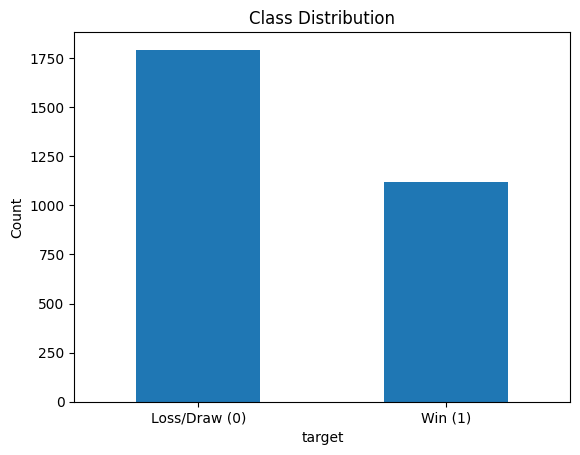

In [20]:
matches['target'].value_counts().plot(kind = 'bar')
plt.title('Class Distribution')
plt.xticks([0,1], ['Loss/Draw (0)', 'Win (1)'], rotation = 0)
plt.ylabel("Count")
plt.show()

#### Imbalanced dataset, win class is a heavy minority whilst loss/draw class is the majority

team_trend = matches[matches['team']=='Arsenal'].sort_values('date')
team_trend['goal_diff_rolling5'] = team_trend['goal_diff'].rolling(5).mean()
plt.figure(figsize=(10,6))
plt.plot(team_trend['date'], team_trend['goal_diff_rolling5'])
plt.title("Arsenal – 5-Match Rolling Goal Difference")
plt.xlabel("Date")
plt.ylabel("Goal Difference (Rolling 5)")
plt.show()

#### Momentum and a team's form  is a key indicator of a football team's success. This can be measured by rolling goal difference. 

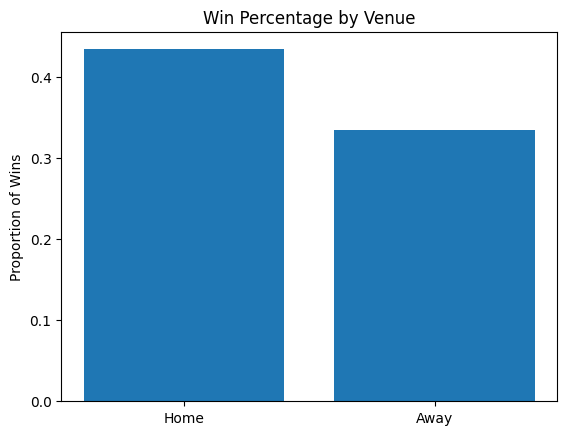

In [21]:
home_win_count = matches[matches['venue']=="Home"]['target'].mean()
away_win_count = matches[matches['venue']=="Away"]['target'].mean()

plt.bar(['Home', 'Away'], [home_win_count, away_win_count])
plt.title("Win Percentage by Venue")
plt.ylabel("Proportion of Wins")
plt.show()

#### We can see that whether a team plays at home or away impacts whether they win or not

/var/folders/87/7jky8609481dxrh7d09kt36m0000gn/T/ipykernel_58978/1684364192.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rest_winrate = matches.groupby('rest_days_bin')['target'].mean()


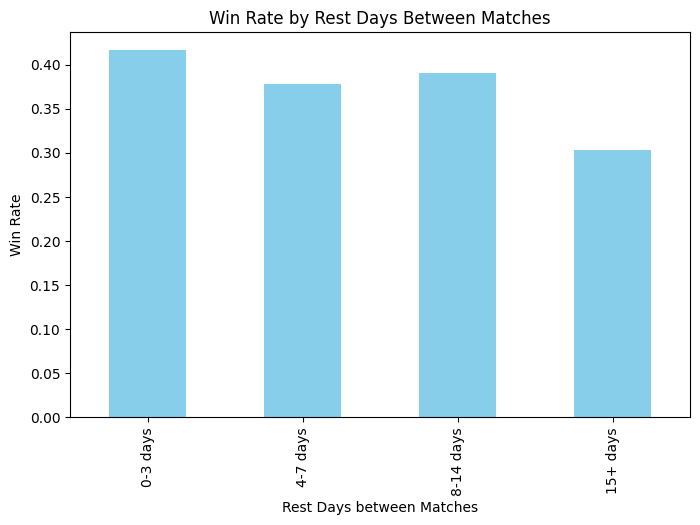

In [22]:
# Bin rest days into categories
matches['rest_days_bin'] = pd.cut(matches['date_diff'],
                                  bins=[0,3,7,14,30],
                                  labels=['0-3 days','4-7 days','8-14 days','15+ days'])

rest_winrate = matches.groupby('rest_days_bin')['target'].mean()

plt.figure(figsize=(8,5))
rest_winrate.plot(kind='bar', color='skyblue')
plt.xlabel('Rest Days between Matches')
plt.ylabel("Win Rate")
plt.title("Win Rate by Rest Days Between Matches")
plt.show()

#### Theoretically, a team should have a higher chance of winning if they have more rest days between matches. Limited rest days force teams to rotate players and this often translates to a weaker starting lineup

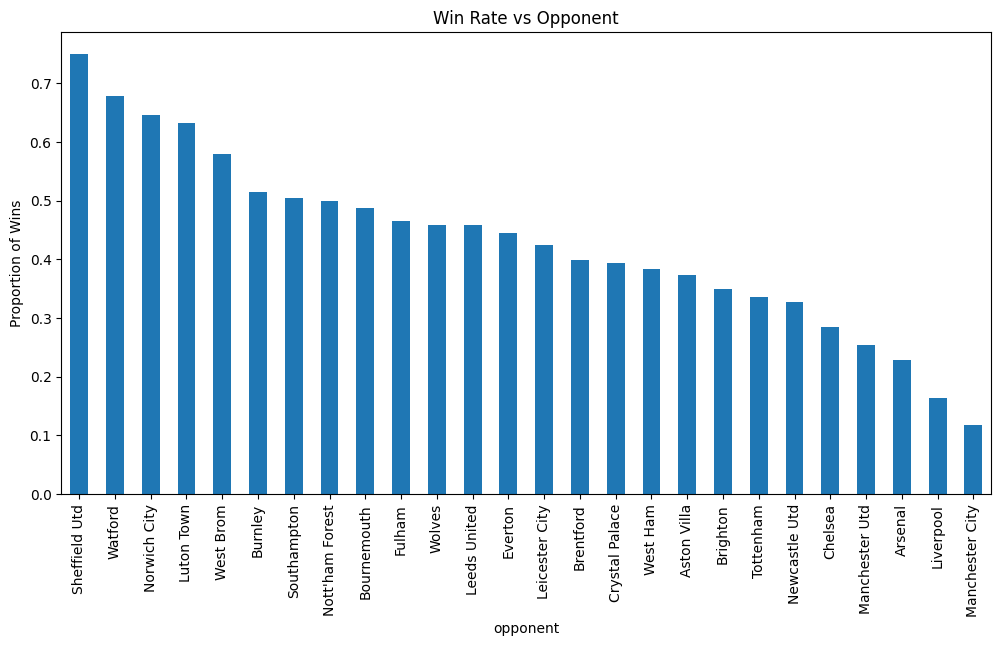

In [23]:
opp_winrate = matches.groupby('opponent')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
opp_winrate.plot(kind='bar')
plt.title("Win Rate vs Opponent")
plt.ylabel("Proportion of Wins")
plt.show()


#### Some teams are stronger than others, and it can be seen that the "big clubs" such as Man City, Liverpool, Arsenal, and Man United are harder to beat.

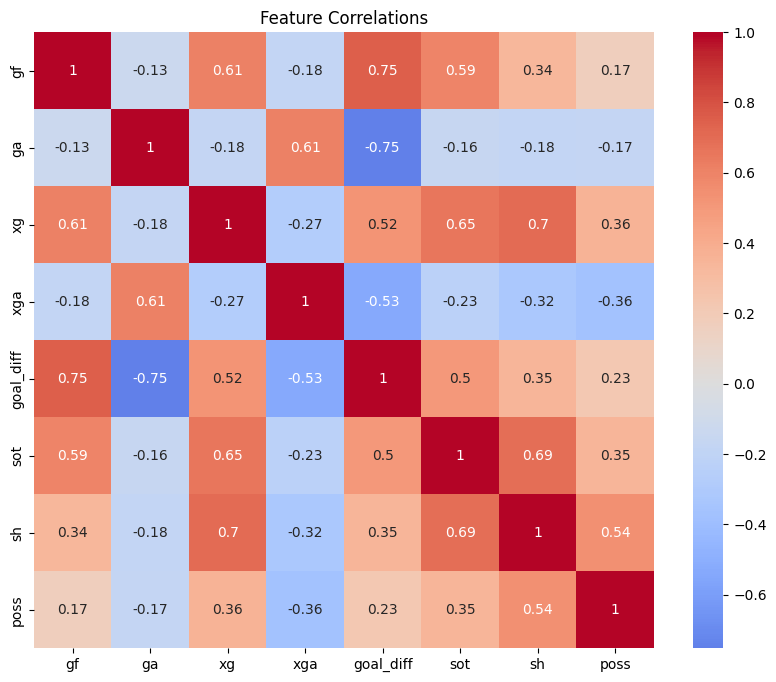

In [24]:
plt.figure(figsize=(10,8))
corr = matches[['gf','ga','xg','xga','goal_diff','sot','sh','poss']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlations")
plt.show()

#### Showing correlation amongst numerical predictors

## Feature Engineering

### Adding predictor for Rest day between matches

In [25]:
grouped_matches = matches.groupby('team')
group = grouped_matches.get_group('Manchester City').sort_values('date')

### Adding predictor for recent form from the last 3,5,8 matches played

In [26]:
def rolling_averages(group,cols, windows):
    all_new_cols = []
    group = group.sort_values('date')
    for w in windows:
        new_cols = [f"{c}_rolling_{w}" for c in cols]
        rolling_stats = group[cols].rolling(w,closed='left').mean()
        group[new_cols] = rolling_stats
        all_new_cols.extend(new_cols)

    group = group.dropna(subset=all_new_cols)
    return group
#takes in data for a team, predictor col names, rolling stats col name, window size, outputs average for rolling stats

In [27]:
cols = ['gf','ga','dist','sh','sot','fk','pk','pkatt','xg','xga','goal_diff']
matches_rolling = matches.groupby(['team','season']).apply(lambda x: rolling_averages(x,cols,(3,5,8)))
matches_rolling.columns

/var/folders/87/7jky8609481dxrh7d09kt36m0000gn/T/ipykernel_58978/897888670.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby(['team','season']).apply(lambda x: rolling_averages(x,cols,(3,5,8)))


Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'opp formation', 'venue_Away', 'venue_Home',
       'opp_code', 'hour', 'day_code', 'target', 'date_diff', 'goal_diff',
       'rest_days_bin', 'gf_rolling_3', 'ga_rolling_3', 'dist_rolling_3',
       'sh_rolling_3', 'sot_rolling_3', 'fk_rolling_3', 'pk_rolling_3',
       'pkatt_rolling_3', 'xg_rolling_3', 'xga_rolling_3',
       'goal_diff_rolling_3', 'gf_rolling_5', 'ga_rolling_5', 'dist_rolling_5',
       'sh_rolling_5', 'sot_rolling_5', 'fk_rolling_5', 'pk_rolling_5',
       'pkatt_rolling_5', 'xg_rolling_5', 'xga_rolling_5',
       'goal_diff_rolling_5', 'gf_rolling_8', 'ga_rolling_8', 'dist_rolling_8',
       'sh_rolling_8', 'sot_rolling_8', 'fk_rolling_8', 'pk_rolling_8',
       'pkatt_rolling_8', 'xg_rolling_8', 'xga

In [28]:
matches_rolling.head()

date   time            comp         round  day venue  \
team    season                                                                  
Arsenal 2021   903 2020-11-22  16:30  Premier League   Matchweek 9  Sun  Away   
               904 2020-11-29  19:15  Premier League  Matchweek 10  Sun  Home   
               905 2020-12-06  16:30  Premier League  Matchweek 11  Sun  Away   
               906 2020-12-13  19:15  Premier League  Matchweek 12  Sun  Home   
               907 2020-12-16  18:00  Premier League  Matchweek 13  Wed  Home   

                   result   gf   ga      opponent  ...  ga_rolling_8  \
team    season                                     ...                 
Arsenal 2021   903      D  0.0  0.0  Leeds United  ...         1.250   
               904      L  1.0  2.0        Wolves  ...         1.250   
               905      L  0.0  2.0     Tottenham  ...         1.375   
               906      L  0.0  1.0       Burnley  ...         1.250   
               907      D  1.0  1.0   Southampton  ...         1.250   

                    dist_rolling_8  sh_rolling_8  sot_rolling_8 fk_rolling_8  \
team    season                                                                 
Arsenal 2021   903         16.3250         8.875          3.250        0.625   
               904         16.9375         8.375          2.875        0.625   
               905         16.8750         9.250          2.750        0.875   
               906         16.8500        10.250          2.625        1.000   
               907         16.7375        11.750          2.750        1.000   

                   pk_rolling_8 pkatt_rolling_8 xg_rolling_8  xga_rolling_8  \
team    season                                                                
Arsenal 2021   903        0.125           0.125       1.1500         1.2750   
               904        0.125           0.125       1.0375         1.5625   
               905        0.125           0.125       1.0125         1.5000   
               906        0.125           0.125       0.9625         1.1625   
               907        0.125           0.125       1.1000         1.2500   

                    goal_diff_rolling_8  
team    season                           
Arsenal 2021   903               -0.125  
               904               -0.500  
               905               -0.750  
               906               -0.750  
               907               -1.000  

[5 rows x 70 columns]

In [29]:
matches_rolling.droplevel('team')

date   time            comp         round  day venue result  \
season                                                                          
2021   903  2020-11-22  16:30  Premier League   Matchweek 9  Sun  Away      D   
       904  2020-11-29  19:15  Premier League  Matchweek 10  Sun  Home      L   
       905  2020-12-06  16:30  Premier League  Matchweek 11  Sun  Away      L   
       906  2020-12-13  19:15  Premier League  Matchweek 12  Sun  Home      L   
       907  2020-12-16  18:00  Premier League  Matchweek 13  Wed  Home      D   
...                ...    ...             ...           ...  ...   ...    ...   
2024   1916 2024-04-24  19:45  Premier League  Matchweek 29  Wed  Home      L   
       1917 2024-04-27  15:00  Premier League  Matchweek 35  Sat  Home      W   
       1918 2024-05-04  17:30  Premier League  Matchweek 36  Sat  Away      L   
       1919 2024-05-11  15:00  Premier League  Matchweek 37  Sat  Home      L   
       1920 2024-05-19  16:00  Premier League  Matchweek 38  Sun  Away      L   

              gf   ga         opponent  ...  ga_rolling_8  dist_rolling_8  \
season                                  ...                                 
2021   903   0.0  0.0     Leeds United  ...         1.250         16.3250   
       904   1.0  2.0           Wolves  ...         1.250         16.9375   
       905   0.0  2.0        Tottenham  ...         1.375         16.8750   
       906   0.0  1.0          Burnley  ...         1.250         16.8500   
       907   1.0  1.0      Southampton  ...         1.250         16.7375   
...          ...  ...              ...  ...           ...             ...   
2024   1916  0.0  1.0      Bournemouth  ...         1.625         16.9250   
       1917  2.0  1.0       Luton Town  ...         1.750         17.6125   
       1918  1.0  5.0  Manchester City  ...         1.500         17.9750   
       1919  1.0  3.0   Crystal Palace  ...         2.000         17.0625   
       1920  0.0  2.0        Liverpool  ...         2.125         17.0625   

             sh_rolling_8  sot_rolling_8 fk_rolling_8 pk_rolling_8  \
season                                                               
2021   903          8.875          3.250        0.625        0.125   
       904          8.375          2.875        0.625        0.125   
       905          9.250          2.750        0.875        0.125   
       906         10.250          2.625        1.000        0.125   
       907         11.750          2.750        1.000        0.125   
...                   ...            ...          ...          ...   
2024   1916        10.375          3.125        0.250        0.125   
       1917        10.625          3.375        0.250        0.125   
       1918        10.750          3.625        0.250        0.125   
       1919        10.000          3.375        0.250        0.125   
       1920        10.125          4.000        0.125        0.125   

            pkatt_rolling_8 xg_rolling_8  xga_rolling_8  goal_diff_rolling_8  
season                                                                        
2021   903            0.125       1.1500         1.2750               -0.125  
       904            0.125       1.0375         1.5625               -0.500  
       905            0.125       1.0125         1.5000               -0.750  
       906            0.125       0.9625         1.1625               -0.750  
       907            0.125       1.1000         1.2500               -1.000  
...                     ...          ...            ...                  ...  
2024   1916           0.125       1.0000         1.4875               -0.750  
       1917           0.125       0.9000         1.6500               -1.000  
       1918           0.125       0.9500         1.4625               -0.500  
       1919           0.125       0.8875         1.6000               -1.125  
       1920           0.125       0.9000         1.8000               -1.125  

[2272 rows x 70 columns

In [30]:
matches_rolling.index = range(0,matches_rolling.shape[0])

In [31]:
matches_rolling.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,ga_rolling_8,dist_rolling_8,sh_rolling_8,sot_rolling_8,fk_rolling_8,pk_rolling_8,pkatt_rolling_8,xg_rolling_8,xga_rolling_8,goal_diff_rolling_8
0,2020-11-22,16:30,Premier League,Matchweek 9,Sun,Away,D,0.0,0.0,Leeds United,...,1.250,16.3250,8.875,3.250,0.625,0.125,0.125,1.1500,1.2750,-0.125
1,2020-11-29,19:15,Premier League,Matchweek 10,Sun,Home,L,1.0,2.0,Wolves,...,1.250,16.9375,8.375,2.875,0.625,0.125,0.125,1.0375,1.5625,-0.500
2,2020-12-06,16:30,Premier League,Matchweek 11,Sun,Away,L,0.0,2.0,Tottenham,...,1.375,16.8750,9.250,2.750,0.875,0.125,0.125,1.0125,1.5000,-0.750
3,2020-12-13,19:15,Premier League,Matchweek 12,Sun,Home,L,0.0,1.0,Burnley,...,1.250,16.8500,10.250,2.625,1.000,0.125,0.125,0.9625,1.1625,-0.750
4,2020-12-16,18:00,Premier League,Matchweek 13,Wed,Home,D,1.0,1.0,Southampton,...,1.250,16.7375,11.750,2.750,1.000,0.125,0.125,1.1000,1.2500,-1.000


In [32]:
windows = [3,5,8]
rolling_cols = []
cols = ['gf','ga','xg','xga','goal_diff','sot','sh','dist','fk','pk','pkatt']

for w in windows: 
    new_cols = [f"{c}_rolling_{w}" for c in cols]
    rolling_cols.extend(new_cols)

In [33]:
predictors = ['venue_Away','venue_Home','hour','day_code','opp_code','date_diff']

In [34]:
from sklearn.feature_selection import mutual_info_classif

X = matches_rolling[predictors + rolling_cols]   
y = matches_rolling['target']    

mi = mutual_info_classif(X, y, random_state=1)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)


sh_rolling_5           0.038275
xg_rolling_3           0.033588
xg_rolling_8           0.030833
opp_code               0.026546
xg_rolling_5           0.025082
fk_rolling_5           0.023003
dist_rolling_8         0.021298
sot_rolling_5          0.020575
pk_rolling_5           0.020068
ga_rolling_3           0.019880
goal_diff_rolling_5    0.019093
sot_rolling_8          0.016522
sot_rolling_3          0.015902
fk_rolling_3           0.014518
xga_rolling_8          0.014311
goal_diff_rolling_8    0.013474
gf_rolling_3           0.012611
hour                   0.012195
sh_rolling_8           0.008589
pkatt_rolling_8        0.008118
gf_rolling_8           0.007998
sh_rolling_3           0.005934
xga_rolling_3          0.005209
dist_rolling_3         0.004923
day_code               0.004521
ga_rolling_5           0.003952
venue_Away             0.003497
goal_diff_rolling_3    0.003305
dist_rolling_5         0.001623
ga_rolling_8           0.000968
gf_rolling_5           0.000439
pk_rolli

#### Shows that predictors like day_code, hour have little to no correlation with the target

## Splitting Data into Training, Validation, Test Sets (70-15-15)

In [35]:
X = matches_rolling[matches_rolling['date']<'2023-12-15']
X_train_full = X[X['date']<'2023-04-28']
X_valid_full = X[X['date']>'2023-04-28']
X_test = matches_rolling[matches_rolling['date']>'2023-12-15']

## Modelling with XGBoost

In [36]:
from xgboost import XGBClassifier
%pip install --upgrade "xgboost==1.7.6"


Note: you may need to restart the kernel to use updated packages.


In [37]:
model = XGBClassifier(n_estimators = 9000, learning_rate = 0.025, random_state = 1, max_depth = 4, eval_metric = 'logloss' ) 

In [38]:
from sklearn.metrics import accuracy_score, precision_score

predictor_cols = predictors + rolling_cols
model.fit(X_train_full[predictor_cols], X_train_full['target'])
preds = model.predict(X_valid_full[predictor_cols])
accuracy = accuracy_score(X_valid_full['target'], preds)
precision = precision_score(X_valid_full['target'], preds) 
print(f"Accuracy: {accuracy}, Precision: {precision}")

Accuracy: 0.6580882352941176, Precision: 0.6071428571428571


In [39]:
booster = model.get_booster()
gain_scores = booster.get_score(importance_type='gain')
print(sorted(gain_scores.items(), key=lambda x: -x[1]))

[('sot_rolling_8', 0.8471466898918152), ('pk_rolling_5', 0.8046082258224487), ('opp_code', 0.6492547988891602), ('pk_rolling_3', 0.6154874563217163), ('day_code', 0.597994327545166), ('gf_rolling_8', 0.5922408103942871), ('ga_rolling_5', 0.5787873268127441), ('ga_rolling_3', 0.570941686630249), ('xga_rolling_3', 0.5669174194335938), ('xga_rolling_5', 0.5521914958953857), ('xg_rolling_8', 0.5507194995880127), ('sh_rolling_8', 0.548029899597168), ('pkatt_rolling_5', 0.5444339513778687), ('goal_diff_rolling_5', 0.5410158038139343), ('sot_rolling_3', 0.5333662629127502), ('date_diff', 0.5323525071144104), ('pkatt_rolling_8', 0.5214964151382446), ('ga_rolling_8', 0.5015490055084229), ('xg_rolling_3', 0.501368522644043), ('hour', 0.5012713074684143), ('pkatt_rolling_3', 0.48420947790145874), ('goal_diff_rolling_3', 0.47741952538490295), ('gf_rolling_5', 0.4743240773677826), ('dist_rolling_3', 0.47088971734046936), ('dist_rolling_5', 0.46915239095687866), ('xga_rolling_8', 0.46420711278915405

In [41]:
model.fit(X_train_full[new_predictor_cols], X_train_full['target'])
preds = model.predict(X_valid_full[new_predictor_cols])
accuracy = accuracy_score(X_valid_full['target'], preds)
precision = precision_score(X_valid_full['target'], preds) 
print(f"Accuracy: {accuracy}, Precision: {precision}")

Accuracy: 0.625, Precision: 0.5483870967741935


##### Experimented with removing features that seem less meaningful and may be noise(e.g., match hour, day code, rolling set-pieces). Surprisingly, precision decreased when these were excluded. This suggests the model was exploiting them as proxies, even if they are not causally important. 

In [42]:
model.fit(X[predictor_cols], X['target'])
preds = model.predict(X_test[predictor_cols])
combined = pd.DataFrame(dict(actual=X_test['target'], predicted = preds), index = X_test.index)
accuracy = accuracy_score(X_test['target'],preds)
precision = precision_score(X_test['target'], preds) 
print(f"Accuracy: {accuracy}, Precision: {precision}")

Accuracy: 0.6255707762557078, Precision: 0.5125


## Pairing Predictions to determine precision at the match level
#### Initially, our evaluation was at the team level: we measured how often predicted wins matched actual wins for each team entry. While valid, this can give misleading impressions because football matches involve two teams and one outcome. By pairing both teams in each fixture, we move to a match-level evaluation

In [43]:
combined = combined.merge(matches_rolling[['date','team','opponent','result']], left_index = True, right_index = True)

In [44]:
combined

,actual,predicted,date,team,opponent,result
93,1,1,2023-12-17,Arsenal,Brighton,W
94,0,0,2023-12-23,Arsenal,Liverpool,D
95,0,1,2023-12-28,Arsenal,West Ham,L
96,0,0,2023-12-31,Arsenal,Fulham,L
97,1,1,2024-01-20,Arsenal,Crystal Palace,W
...,...,...,...,...,...,...
2267,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L
2268,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W
2269,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L
2270,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L


In [45]:
class MissingDict(dict): ## creating a class that inherits from the dictionary class
    __missing__ = lambda self, key: key ## in case a team name is missing

map_values = {
    "Brighton and Hove Albion": "Brighton",
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham", 
    "West Ham United": "West Ham", 
    "Wolverhampton Wanderers": "Wolves",
    "Newcastle United": "Newcastle Utd",
    "Nottingham Forest": "Nott'ham Forest",
    "Sheffield United": "Sheffield Utd"
}
mapping = MissingDict(**map_values)


In [46]:
combined['new_team'] = combined['team'].map(mapping)

In [47]:
combined

,actual,predicted,date,team,opponent,result,new_team
93,1,1,2023-12-17,Arsenal,Brighton,W,Arsenal
94,0,0,2023-12-23,Arsenal,Liverpool,D,Arsenal
95,0,1,2023-12-28,Arsenal,West Ham,L,Arsenal
96,0,0,2023-12-31,Arsenal,Fulham,L,Arsenal
97,1,1,2024-01-20,Arsenal,Crystal Palace,W,Arsenal
...,...,...,...,...,...,...,...
2267,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L,Wolves
2268,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W,Wolves
2269,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L,Wolves
2270,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L,Wolves


In [48]:
merged = combined.merge(combined,left_on = ['date','new_team'], right_on = ['date','opponent'])

In [49]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,1,1,2023-12-17,Arsenal,Brighton,W,Arsenal,0,0,Brighton and Hove Albion,Arsenal,L,Brighton
1,0,0,2023-12-23,Arsenal,Liverpool,D,Arsenal,0,1,Liverpool,Arsenal,D,Liverpool
2,0,1,2023-12-28,Arsenal,West Ham,L,Arsenal,1,0,West Ham United,Arsenal,W,West Ham
3,0,0,2023-12-31,Arsenal,Fulham,L,Arsenal,1,0,Fulham,Arsenal,W,Fulham
4,1,1,2024-01-20,Arsenal,Crystal Palace,W,Arsenal,0,0,Crystal Palace,Arsenal,L,Crystal Palace
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L,Wolves,1,0,Bournemouth,Wolves,W,Bournemouth
434,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W,Wolves,0,0,Luton Town,Wolves,L,Luton Town
435,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L,Wolves,1,1,Manchester City,Wolves,W,Manchester City
436,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L,Wolves,1,0,Crystal Palace,Wolves,W,Crystal Palace


In [50]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

actual_x
1    69
0    57
Name: count, dtype: int64

## Precision at match level = 0.55